# First time got the alt11 data on 22-Sep-2020



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString
import rasterio as rio
import pandas as pd

In [2]:
import sys
sys.path.append('/Users/home/whitefar/DATA/code/REMOTE_SENSING/ICESAT/')
from cross_channel import icesat_dataset

In [3]:
ds = icesat_dataset("/Volumes/arc_02/REMOTE_SENSING/ICESAT2/ATLAS/ATLXI/ds_subset_kamb_20200716.nc")

For this dataset
cycle number, corresponding number of points
7    1175
6    1175
5    1175
4    1175
3    1175
2    1175
1    1175
8    1175
Name: cycle_number, dtype: int64
cycle number, corresponding number of non NaN points
3    1153
7     777
5     639
4     523
6     368
8      80
Name: cycle_number, dtype: int64


In [4]:
print(dir(ds))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'channel_mid', 'gda', 'gda_lines', 'getdata_alllines', 'getdata_line', 'is_lines', 'meta', 'plot_dhdt_crosssection', 'plot_dhdt_crosssection_map', 'plot_dhdt_map', 'plot_icesat_lines_map', 'plot_line_crosssection', 'plot_multiple_dhdt_crosssection', 'plot_multiple_dhdt_crosssection_map']


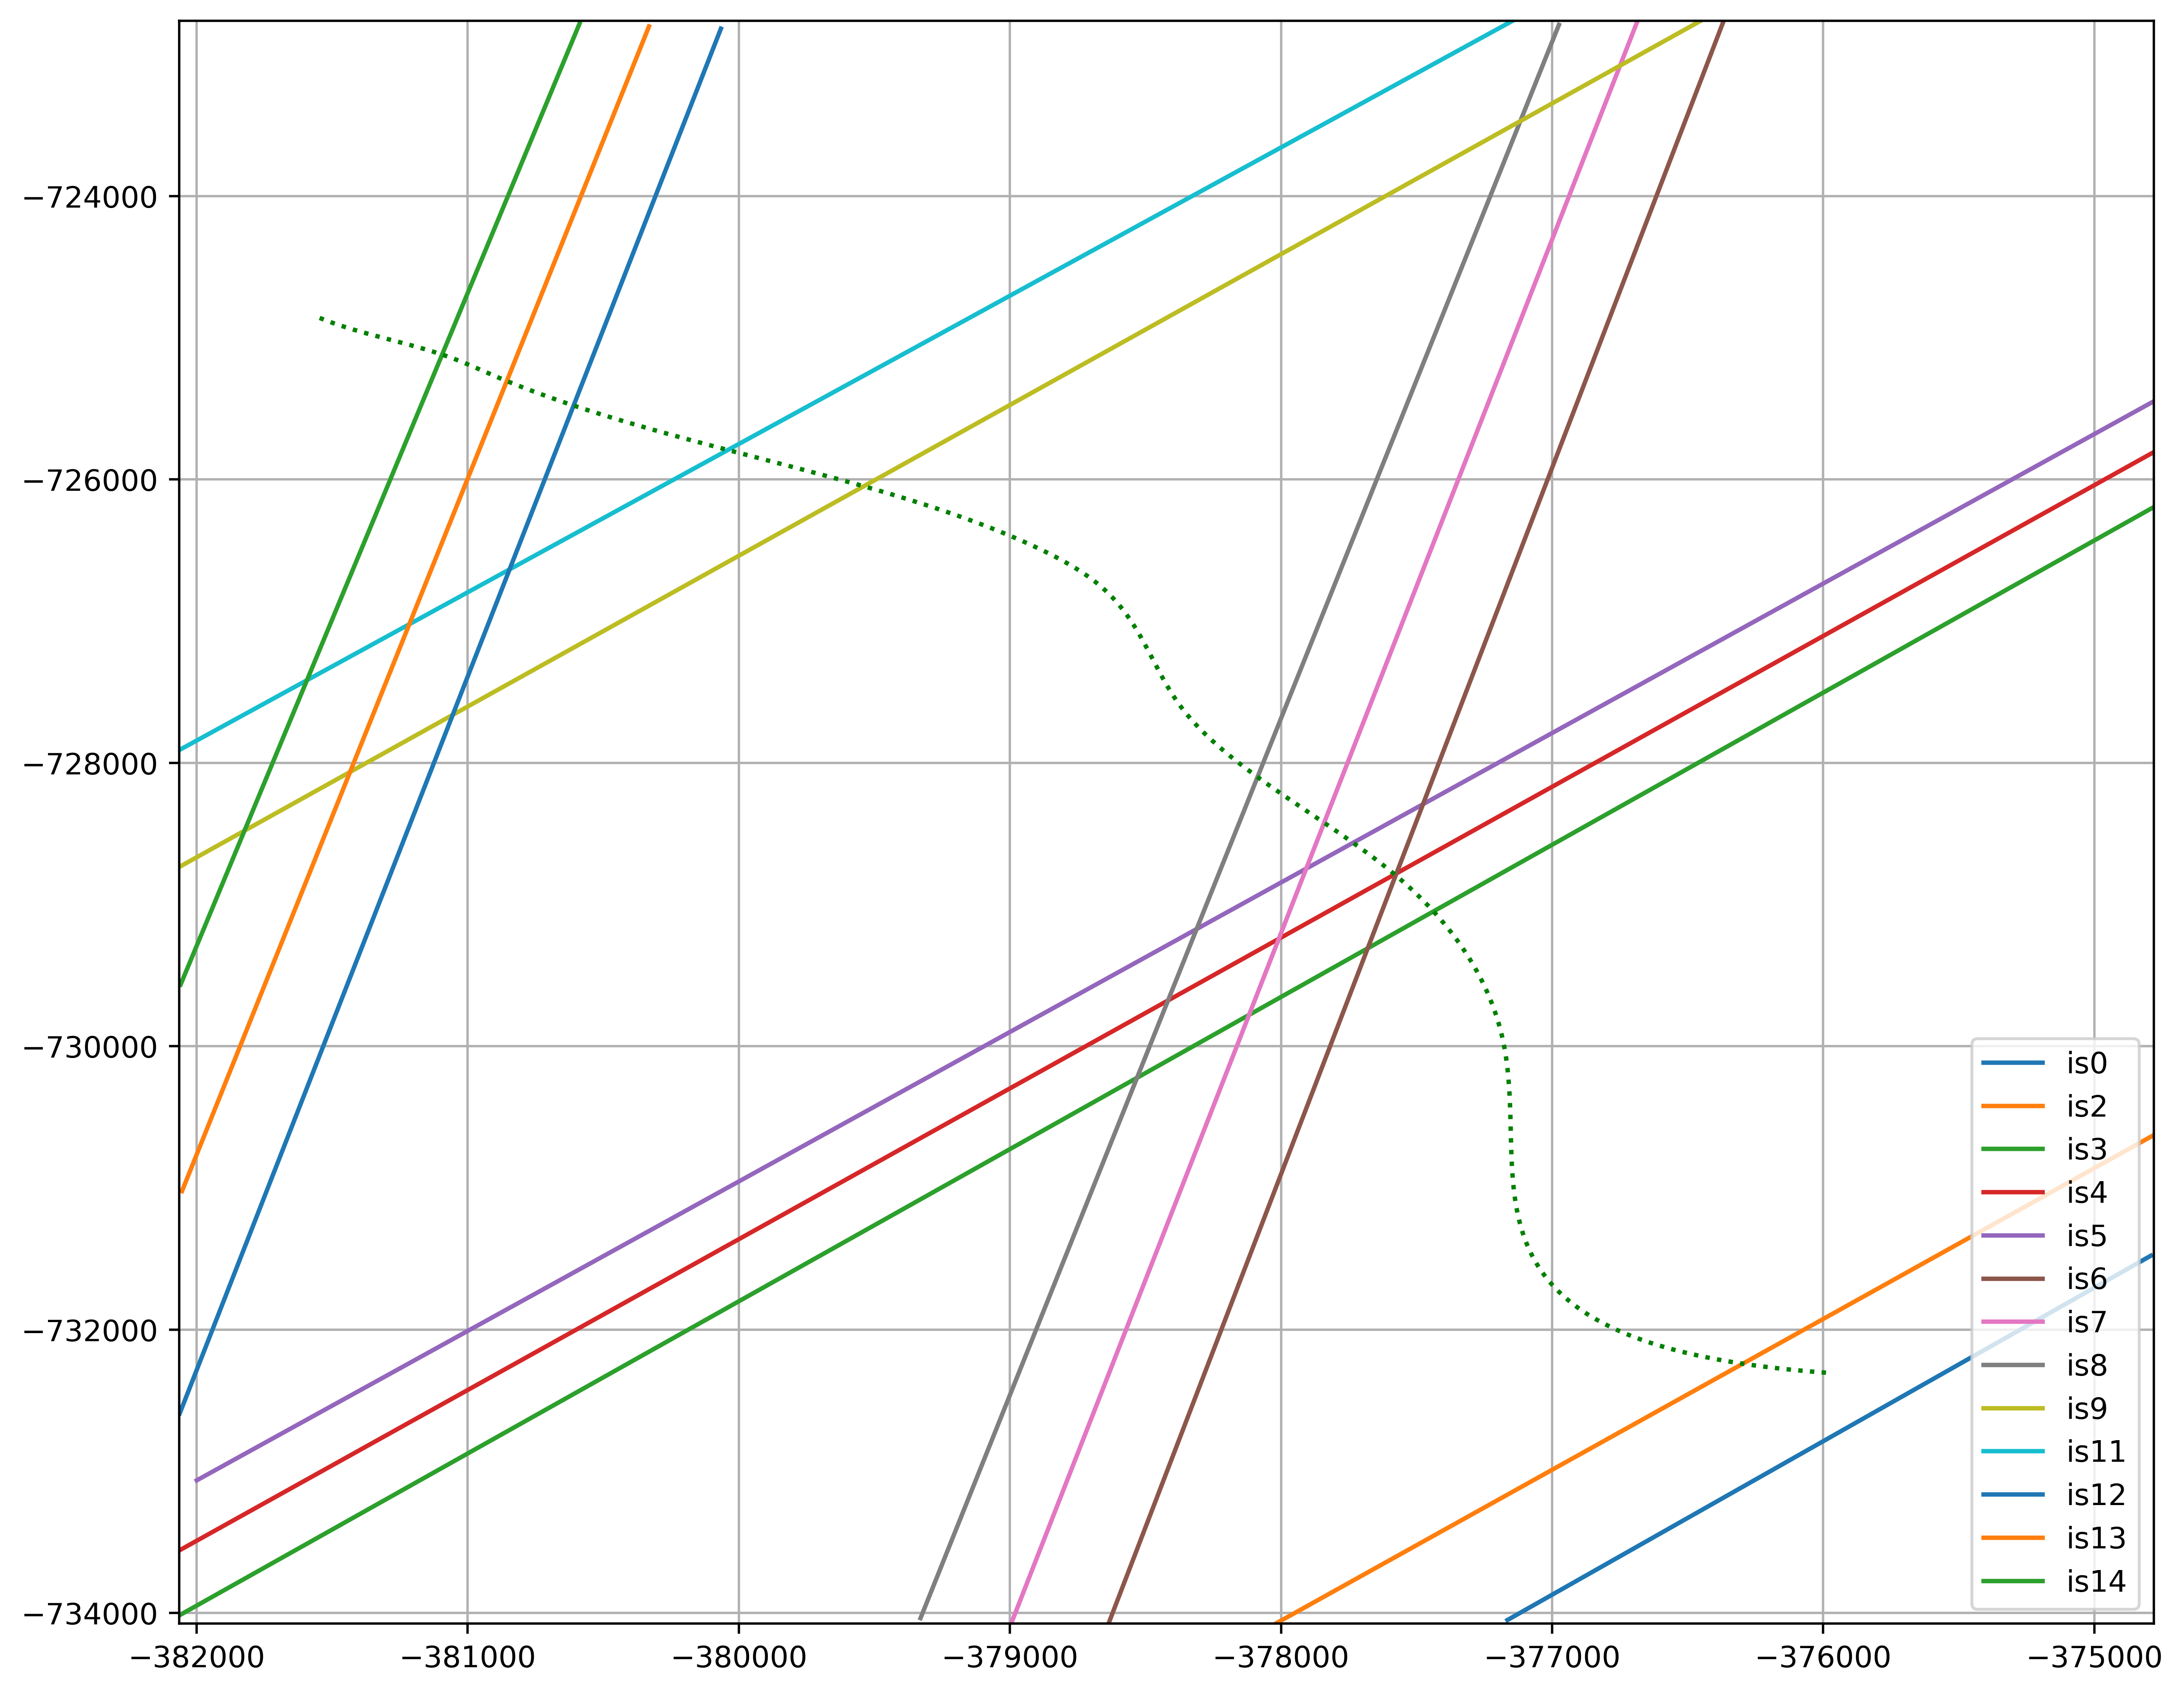

In [5]:
ds.plot_icesat_lines_map()


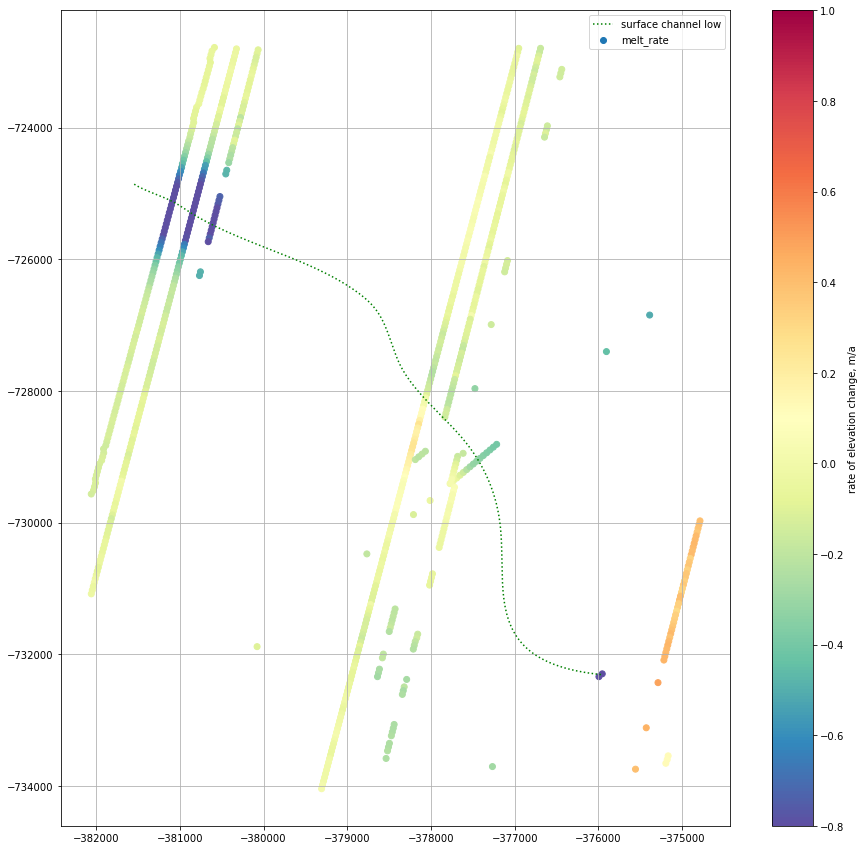

In [6]:
ds.plot_dhdt_map(cycle_number_from=3,cycle_number_till=7)

In [7]:
ds.getdata_alllines(buff=30)

icesat_line_number    0    2     3     4    5     6      7      8     9   \
cycle_number                                                               
3                   63.0  6.0  26.0  12.0  8.0  48.0  193.0  198.0  30.0   
4                   63.0  6.0   2.0  11.0  6.0   NaN  193.0    NaN  25.0   
5                    2.0  2.0  23.0   2.0  6.0   2.0  193.0    NaN   6.0   
6                   61.0  4.0  21.0   9.0  4.0   2.0    NaN    NaN  23.0   
7                    2.0  2.0  24.0   1.0  6.0  48.0  111.0  198.0   7.0   
8                    NaN  NaN   NaN   NaN  NaN  34.0    NaN    NaN   1.0   

icesat_line_number     11     12     13     14  
cycle_number                                    
3                   103.0  170.0  146.0  122.0  
4                     2.0  168.0    NaN    NaN  
5                   101.0  170.0    1.0  110.0  
6                    99.0    6.0    1.0  122.0  
7                     4.0   48.0  145.0  120.0  
8                     2.0    NaN    NaN   46.0  

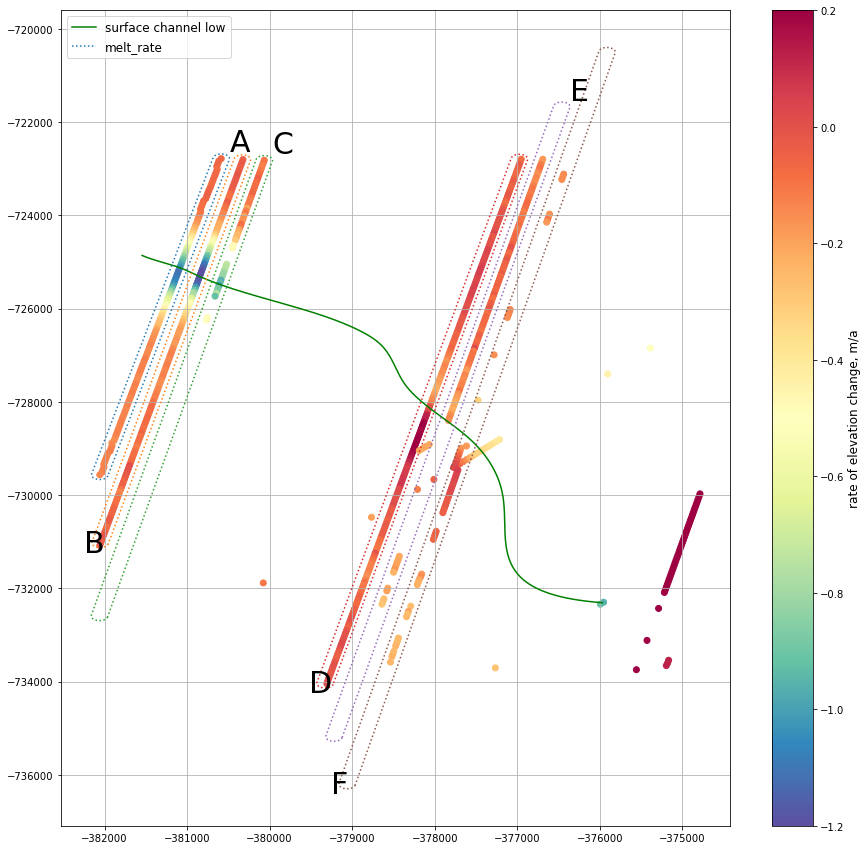

In [8]:
ds.plot_multiple_dhdt_crosssection_map(cycle_number_from=3,cycle_number_till=7,
                                       icesat_lines = [[14,'up'],[13,'down'],[12,'up'],[8,'down'],
                                                       [7,'up'],[6,'down']],
                                      buff=100,vmin=-1.2,vmax=0.2)

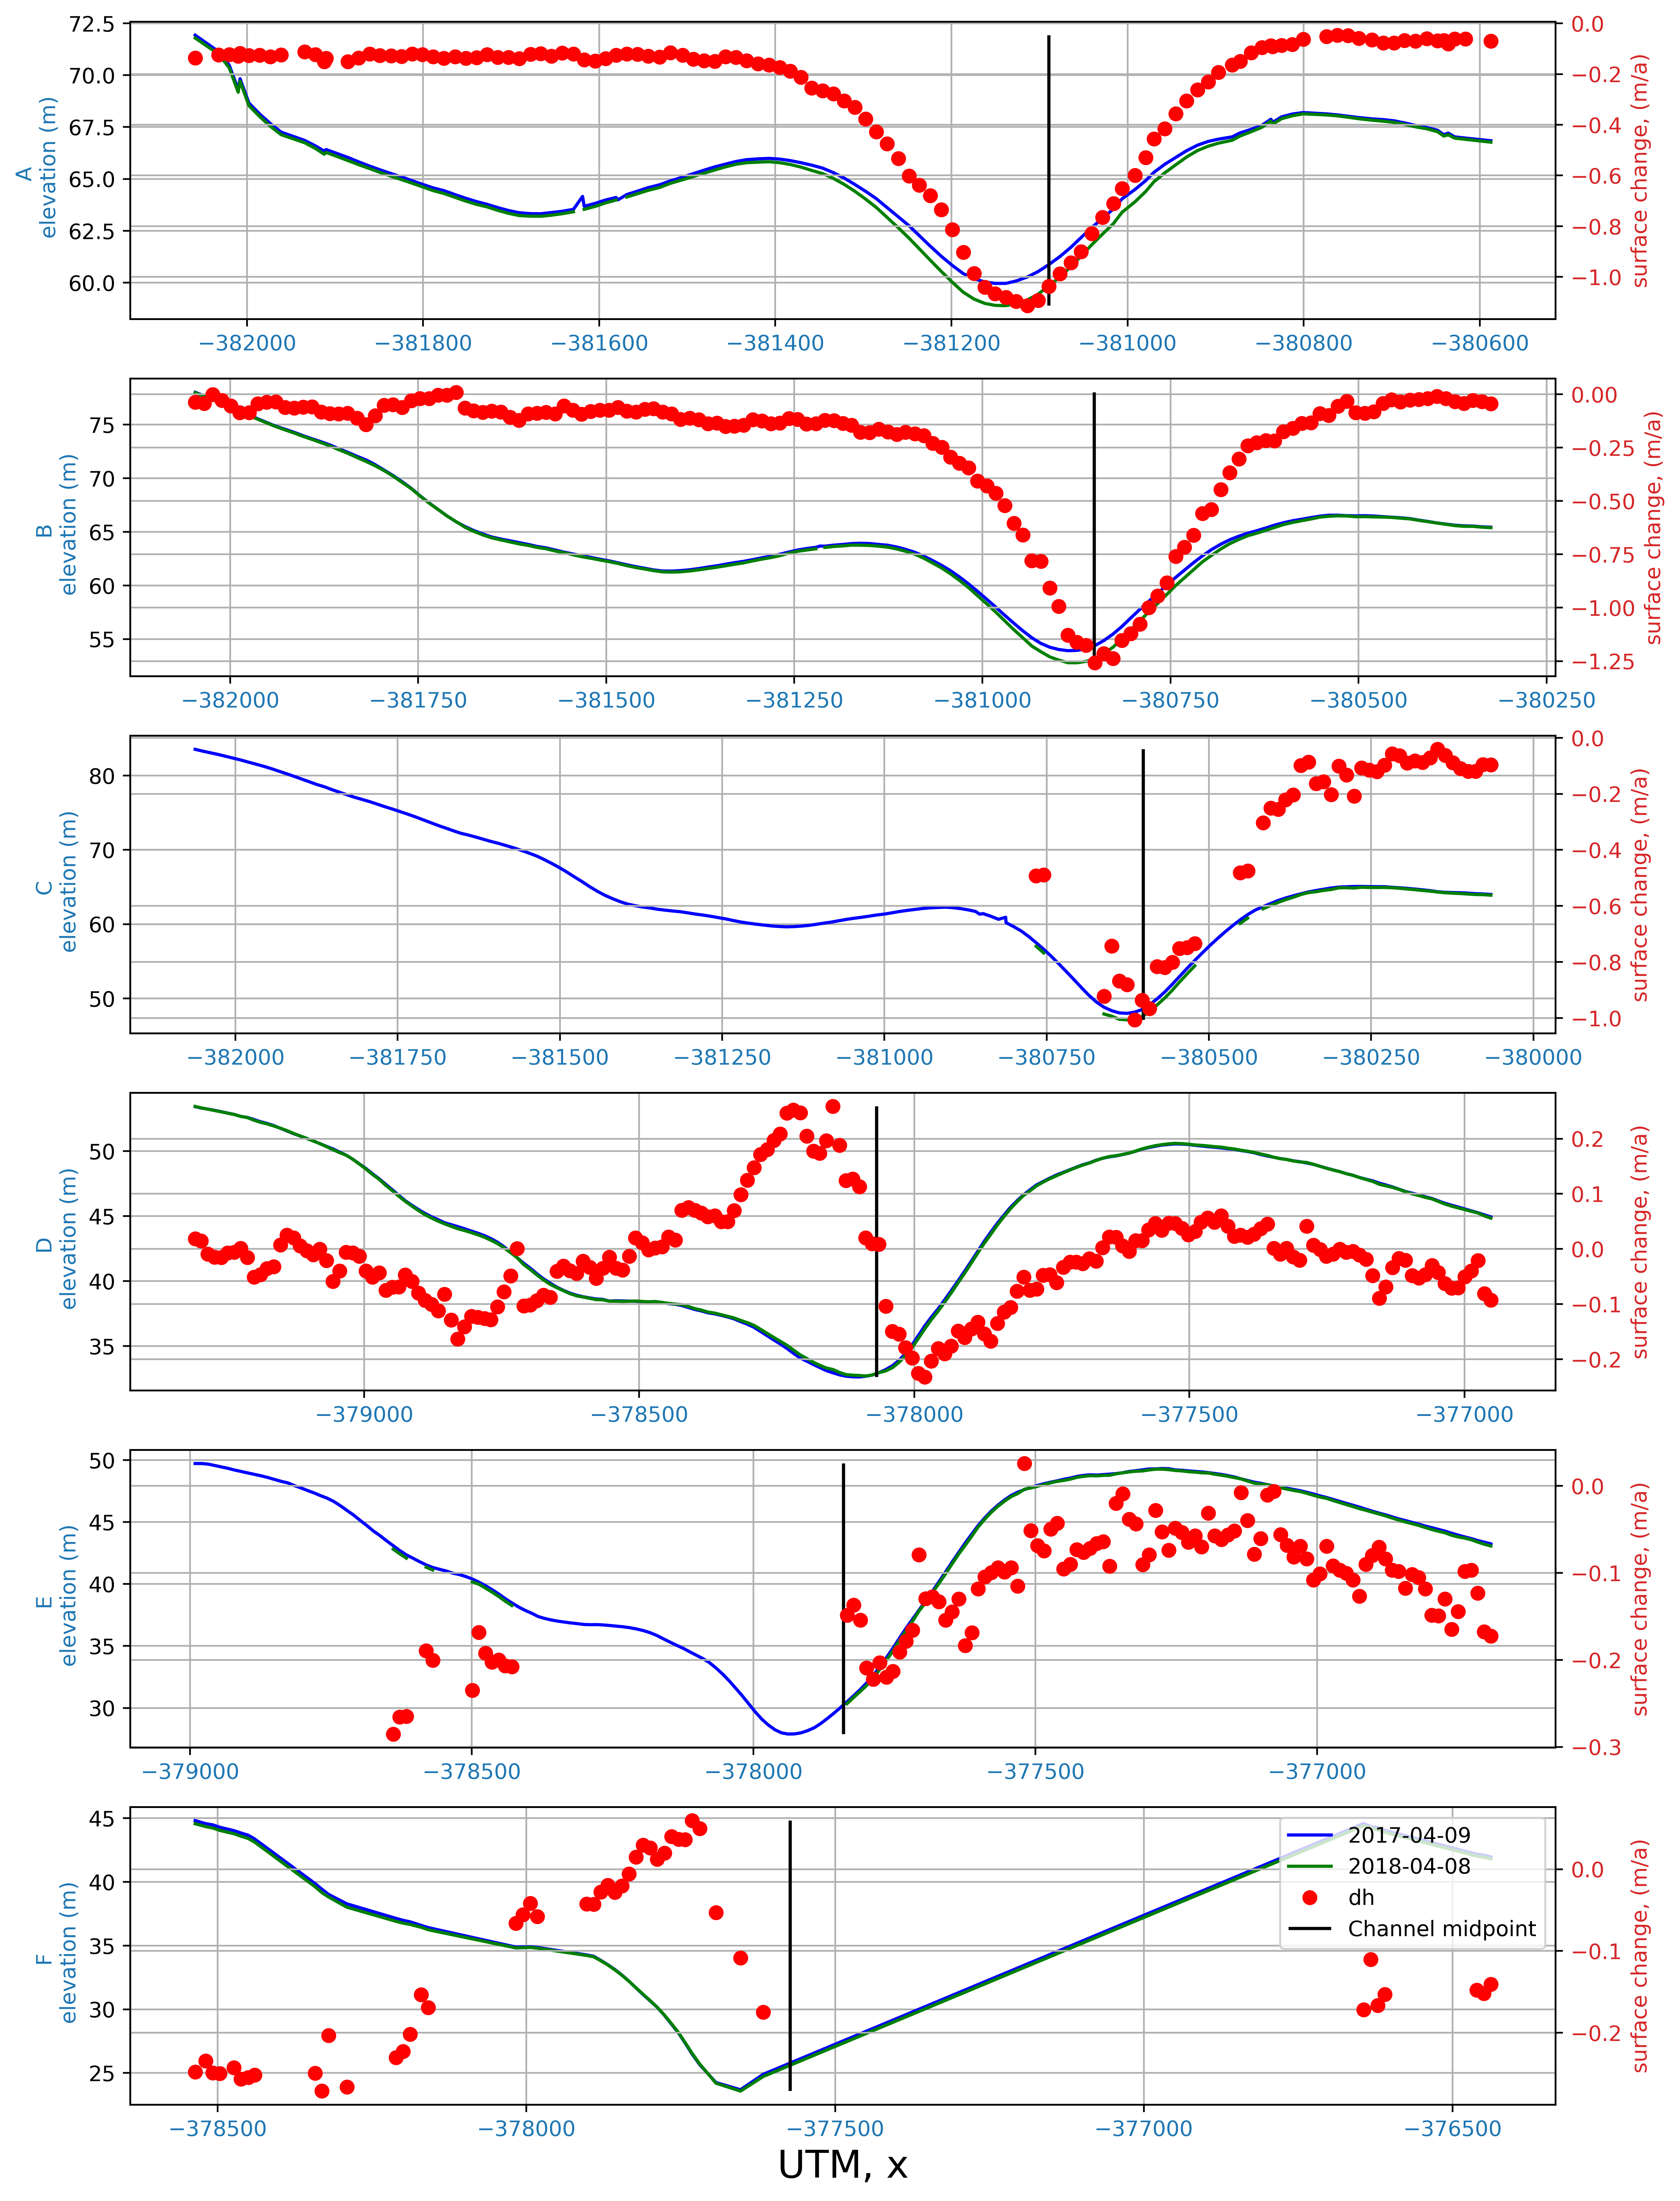

In [9]:
ds.plot_multiple_dhdt_crosssection(cycle_number_from=3,cycle_number_till=7,                                    
                                   icesat_lines = [[14,'up'],[13,'down'],[12,'up'],[8,'up'],
                                                       [7,'down'],[6,'up']])

# plot rema diff with icesat2 diff

In [10]:
cycle_number_from=3
cycle_number_till=7
# This dataframe has h_corr from cycle_number_from, and dhdt. Times are from cycle_number_from
dadh = gpd.GeoDataFrame( ds.gda[ds.gda.cycle_number==cycle_number_from],geometry=ds.gda.geometry )
dadh['dh'] =(ds.gda[ds.gda.cycle_number==cycle_number_from].h_corr.to_numpy() -
                      ds.gda[ds.gda.cycle_number==cycle_number_till].h_corr.to_numpy())
# get the time in years between data points
dadh['dt'] = (ds.gda[ds.gda.cycle_number==cycle_number_till].utc_time.to_numpy()  - 
                  ds.gda[ds.gda.cycle_number==cycle_number_from].utc_time.to_numpy()  ) 
dadh.dt = dadh.dt /  np.timedelta64(1, 'Y')
dadh['dhdt'] = dadh['dh'].to_numpy() / dadh['dt'].to_numpy()   
#up and down refer to where the label goes
# icesat_lines = [[12,'up'],[11,'down'],[7,'up'],[3,'up']]
# dict_entrys = [[f'is{icesat_line_number[0]}',icesat_line_number[1]] for icesat_line_number in icesat_lines]

In [11]:
#load REMA
nid1 = 159202  # 2012-12-24
nid2 = 131226  # 2016-11-09
df = gpd.read_file('/Users/home/whitefar/DATA/REMOTE_SENSING/REMA_2m_strips/REMA_Strip_Index_Rel1.shp')
path = f"/Volumes/arc_02/whitefar/DATA/REMOTE_SENSING/REMA_STRIPES/DIFFERENCES/REMA_{nid1}-{nid2}_diff.tif"
f = df.loc[nid1].acquisitio
t =df.loc[nid2].acquisitio
duration = (pd.to_datetime(t)-pd.to_datetime(f)).days/365.25
with rio.open(path) as image:
    im = image.read(1)
    im[im==-9999] = np.nan
    im = im / duration

In [12]:
points_x = np.load('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/points_x_channel.npy')
points_y = np.load('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/points_y_channel.npy') 

<Figure size 1080x1080 with 0 Axes>

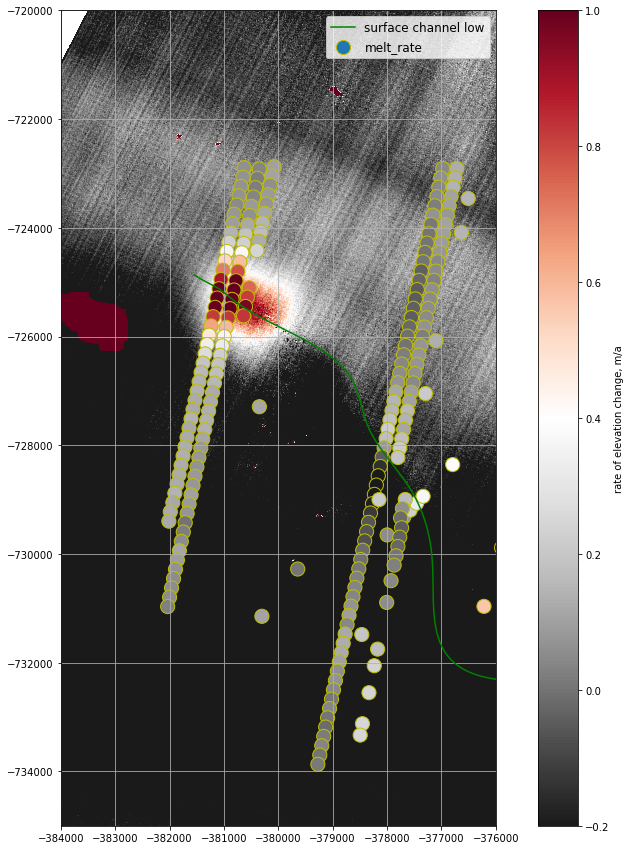

In [13]:
plt.figure(figsize=(15,15))

extent_REMA1 = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
plt.figure(figsize=(15,15))
GyRd = plt.cm.get_cmap('RdGy').reversed()
plt.imshow(im,extent=extent_REMA1, vmin=-0.2,vmax=1,cmap=GyRd)
cb = plt.colorbar()
cb.set_label('rate of elevation change, m/a')

ss=3
plt.scatter(dadh.x.rolling(window=ss).mean().iloc[::ss],
            dadh.y.rolling(window=ss).mean().iloc[::ss],
            c=dadh.dhdt.rolling(window=ss).mean().iloc[::ss],cmap=GyRd,vmin=-0.2, vmax=1, edgecolors='y',s=200)
plt.plot(ds.channel_mid.geometry.x,ds.channel_mid.geometry.y,'g-')
i=65
# for polygon, text_loc in polygons:   
    
#     plt.plot(polygon.exterior.xy[0],polygon.exterior.xy[1],':',label='is polygon')
#     if text_loc == 'up':
#         plt.text(np.max(polygon.exterior.xy[0]) + buff/2,np.max(polygon.exterior.xy[1]),chr(i),size=30)
#     elif text_loc == 'down':
#             plt.text(np.min(polygon.exterior.xy[0])- buff,np.min(polygon.exterior.xy[1])- buff,chr(i),size=30)
#     i += 1
plt.legend(['surface channel low','melt_rate'],fontsize=12)
plt.grid()
plt.xlim([-384000, -376000])
plt.ylim([-735000,-720000])
plt.show()

## Plot with minimum ice thickness in the channel
ie the first low after the start of the channel

this has index=39 (found at DATA/Jupyter/RADAR/RADAR_MAP/29_RADAR_plots_for_present.ipynb)

<Figure size 1080x1080 with 0 Axes>

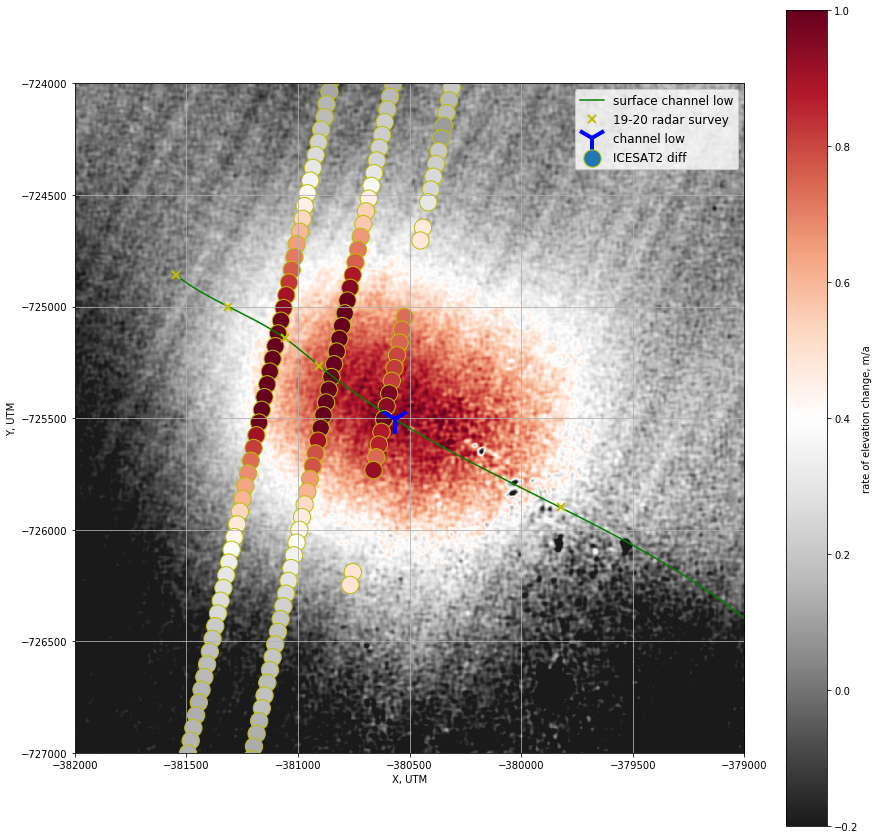

In [14]:
plt.figure(figsize=(15,15))

extent_REMA1 = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
plt.figure(figsize=(15,15))
GyRd = plt.cm.get_cmap('RdGy').reversed()
plt.imshow(im,extent=extent_REMA1, vmin=-0.2,vmax=1,cmap=GyRd,label='REMA diff')
cb = plt.colorbar()
cb.set_label('rate of elevation change, m/a')

plt.scatter(dadh.x,dadh.y,c=dadh.dhdt,cmap=GyRd,vmin=-0.2, vmax=1, edgecolors='y',s=300,label='ICESAT2 diff')

plt.plot(ds.channel_mid.geometry.x,ds.channel_mid.geometry.y,'g-',label='surface channel low')

plt.plot(points_x[10,:],points_y[10,:],'yx',label="19-20 radar survey",markersize=8,markeredgewidth=2)

plt.plot(ds.channel_mid.geometry.x.iloc[39],ds.channel_mid.geometry.y.iloc[39],'b1',label="channel low",markersize=30,markeredgewidth=4)

plt.legend(fontsize=12)
plt.grid()
plt.xlim([-382000, -379000])
plt.ylim([-727000,-724000])
plt.xlabel('X, UTM')
plt.ylabel('Y, UTM')
plt.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/diff_icesat_rema.png')
plt.show()

In [15]:
ds_older = icesat_dataset("/Volumes/arc_02/REMOTE_SENSING/ICESAT2/ds_subset_kamb.nc")

For this dataset
cycle number, corresponding number of points
5    613
3    613
1    613
6    613
4    613
2    613
Name: cycle_number, dtype: int64
cycle number, corresponding number of non NaN points
3    591
5    365
4    323
Name: cycle_number, dtype: int64


In [ ]:
plt.figure(figsize=(15,15))

extent_REMA1 = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
plt.figure(figsize=(15,15))
GyRd = plt.cm.get_cmap('RdGy').reversed()
plt.imshow(im,extent=extent_REMA1, vmin=-0.2,vmax=1,cmap=GyRd,label='REMA diff')
cb = plt.colorbar()
cb.set_label('rate of elevation change, m/a')

plt.scatter(dadh.x,dadh.y,c=dadh.dhdt,cmap=GyRd,vmin=-0.2, vmax=1, edgecolors='y',s=300,label='ICESAT2 diff')

plt.plot(ds.channel_mid.geometry.x,ds.channel_mid.geometry.y,'g-',label='surface channel low')

plt.plot(points_x[10,:],points_y[10,:],'yx',label="19-20 radar survey",markersize=8,markeredgewidth=2)

plt.plot(ds.channel_mid.geometry.x.iloc[39],ds.channel_mid.geometry.y.iloc[39],'b1',label="channel low",markersize=30,markeredgewidth=4)

plt.legend(fontsize=12)
plt.grid()
plt.xlim([-382000, -379000])
plt.ylim([-727000,-724000])
plt.xlabel('X, UTM')
plt.ylabel('Y, UTM')
plt.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/diff_icesat_rema.png')
plt.show()